In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

start = '2010-01-01'
end = '2019-12-31'

import yfinance as yf

df = yf.download('AAPL', start=start, end=end)
print(df.head())


[*********************100%%**********************]  1 of 1 completed

                Open      High       Low     Close  Adj Close     Volume
Date                                                                    
2010-01-04  7.622500  7.660714  7.585000  7.643214   6.461975  493729600
2010-01-05  7.664286  7.699643  7.616071  7.656429   6.473148  601904800
2010-01-06  7.656429  7.686786  7.526786  7.534643   6.370183  552160000
2010-01-07  7.562500  7.571429  7.466071  7.520714   6.358407  477131200
2010-01-08  7.510714  7.571429  7.466429  7.570714   6.400681  447610800


In [16]:
df = df.reset_index()
df.head()

,index,Date,Open,High,Low,Close,Adj Close,Volume
0,0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.461975,493729600
1,1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.473148,601904800
2,2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.370183,552160000
3,3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.358407,477131200
4,4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.400681,447610800


In [17]:
df = df.drop(['Adj Close'], axis=1)
df.head()

,index,Date,Open,High,Low,Close,Volume
0,0,2010-01-04,7.622500,7.660714,7.585000,7.643214,493729600
1,1,2010-01-05,7.664286,7.699643,7.616071,7.656429,601904800
2,2,2010-01-06,7.656429,7.686786,7.526786,7.534643,552160000
3,3,2010-01-07,7.562500,7.571429,7.466071,7.520714,477131200
4,4,2010-01-08,7.510714,7.571429,7.466429,7.570714,447610800


In [18]:
ma100 = df.Close.rolling(100).mean()
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2510    59.201075
2511    59.401700
2512    59.643125
2513    59.875125
2514    60.106325
Name: Close, Length: 2515, dtype: float64

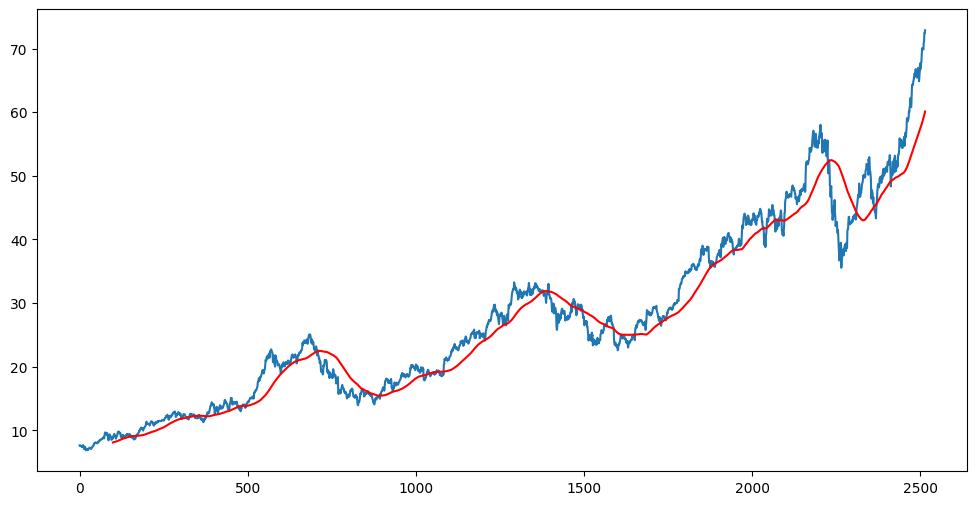

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.show()
#

In [20]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2510    54.132313
2511    54.261513
2512    54.396763
2513    54.529350
2514    54.661100
Name: Close, Length: 2515, dtype: float64

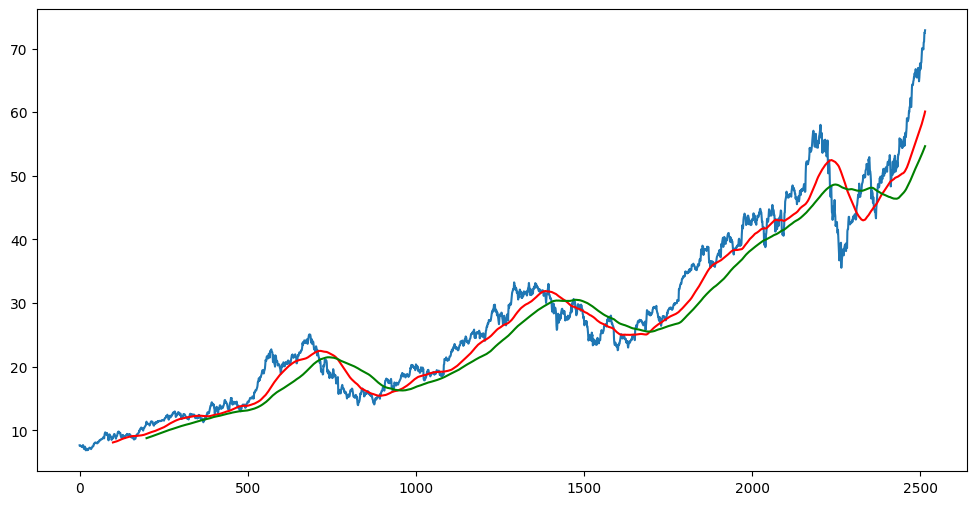

In [21]:
plt.figure(figsize=(12, 6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')
plt.show()

In [22]:
df.shape

(2515, 7)

In [23]:
# splitting data into training and testing
data_training = pd.DataFrame(df['Close'][0:int(len(df) * 0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df) * 0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1760, 1)
(755, 1)


In [25]:
data_training.head()


,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [26]:
data_testing.head()

,Close
1760,29.182501
1761,28.955000
1762,29.037500
1763,29.004999
1764,29.152500


In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [28]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.02971782],
       [0.03021854],
       [0.02560389],
       ...,
       [0.84388656],
       [0.85089656],
       [0.84616011]])

In [29]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i - 100:i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [30]:
# ML Model

In [31]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [32]:
model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [34]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
52/52 [==============================] - 34s 485ms/step - loss: 0.0499
Epoch 2/50
52/52 [==============================] - 26s 503ms/step - loss: 0.0117
Epoch 3/50
52/52 [==============================] - 28s 542ms/step - loss: 0.0100
Epoch 4/50
52/52 [==============================] - 26s 491ms/step - loss: 0.0094
Epoch 5/50
52/52 [==============================] - 27s 509ms/step - loss: 0.0090
Epoch 6/50
52/52 [==============================] - 27s 517ms/step - loss: 0.0085
Epoch 7/50
52/52 [==============================] - 27s 517ms/step - loss: 0.0080
Epoch 8/50
52/52 [==============================] - 27s 517ms/step - loss: 0.0068
Epoch 9/50
52/52 [==============================] - 27s 513ms/step - loss: 0.0072
Epoch 10/50
52/52 [==============================] - 27s 513ms/step - loss: 0.0073
Epoch 11/50
52/52 [==============================] - 27s 515ms/step - loss: 0.0065
Epoch 12/50
52/52 [==============================] - 27s 511ms/step - loss: 0.0071
Epoch 13/50
5